In [1]:
import tensorflow as tf
tf.__version__

2025-09-02 12:02:54.609239: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.20.0'

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# MNIST data load

In [1]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

2025-09-02 15:28:42.648861: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(60000, 28, 28)

In [2]:
X_train = X_train.reshape(-1, 28,28,1)/255.0
X_test = X_test.reshape(-1,28,28,1)/255.0
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# 합성곱 신경망의 구조

In [3]:
from tensorflow.keras import Sequential, layers
model = Sequential(
  [
    layers.Input(shape=(28,28,1)), #3차원 이미지 1장의 입력 
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(), #default(2,2)
    layers.Dropout(0.1),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),#분류 계층
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax') #출력 계층
  ]
)

I0000 00:00:1756794533.891829  110230 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 모델 설정
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
#모델 학습
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10


2025-09-02 15:30:08.300243: I external/local_xla/xla/service/service.cc:163] XLA service 0x774624004b10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-02 15:30:08.300270: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-09-02 15:30:08.318507: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-02 15:30:08.442622: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002


 45/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3793 - loss: 1.8031

I0000 00:00:1756794611.425629  110399 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8960 - loss: 0.3326
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9660 - loss: 0.1115
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9754 - loss: 0.0828
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9793 - loss: 0.0676
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9822 - loss: 0.0592
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9843 - loss: 0.0533
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9856 - loss: 0.0473
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9861 - loss: 0.0464
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9872 - loss: 0.0409
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9883 - loss: 0.0378


In [8]:
model.evaluate(X_test, y_test, verbose=1)

2025-09-02 15:40:32.798867: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_93', 20 bytes spill stores, 20 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9925 - loss: 0.0217


[0.021676164120435715, 0.9925000071525574]

# RESNET 활용하기

In [11]:
from tensorflow.keras.applications import ResNet50
model = ResNet50(weights='imagenet')
#model.summary()

# 테스트용 이미지 로드

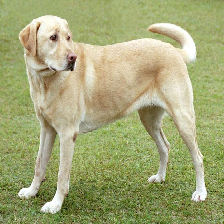

In [14]:
from tensorflow.keras.preprocessing import image

img = image.load_img('YellowLabradorLooking_new.jpg', target_size=(224,224))
img

In [15]:
import numpy as np
from tensorflow.keras.applications.resnet50 import decode_predictions

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
pred = model.predict(x, verbose=0)
decode_predictions(pred, top=3)

[[('n02099712', 'Labrador_retriever', np.float32(0.26847023)),
  ('n02108089', 'boxer', np.float32(0.1510946)),
  ('n02099849', 'Chesapeake_Bay_retriever', np.float32(0.10792644))]]

# 전이학습 : 출력층을 바꾼다
include_top=False
마지막 출력층의 값을 3개로 설정한다.

## 분류모델 추가하기


In [17]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

res_model = ResNet50(weights='imagenet', input_shape=(224,224,3), include_top=False)
res_model.trainable = True

model = Sequential()
model.add(res_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │   102,761,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,352,259 (482.00 MB)

 Trainable params: 126,299,139 (481.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [18]:
import zipfile
file_path = 'glaucoma.zip'
with zipfile.ZipFile(file_path, 'r') as f:
  f.extractall('./datasets/')

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.2, height_shift_range=0.2,
                               horizontal_flip=True)
train_data = train_gen.flow_from_directory('./datasets/glaucoma/train', target_size=(224,224),
                                           batch_size=32, class_mode='sparse')

test_gen = ImageDataGenerator()
test_data = test_gen.flow_from_directory('./datasets/glaucoma/test', target_size=(224,224),
                                         batch_size=32, class_mode='sparse')

Found 1394 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [20]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
#모델 학습
model.fit(train_data, validation_data=test_data, epochs=20, verbose=1)

/home/devuser/miniconda3/envs/tf_cuda_env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.5657 - loss: 23.5642

2025-09-02 16:27:43.546698: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_16168', 4 bytes spill stores, 4 bytes spill loads

2025-09-02 16:27:43.832583: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_16038', 56 bytes spill stores, 56 bytes spill loads



44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 699ms/step - accuracy: 0.5676 - loss: 23.2271

2025-09-02 16:28:06.130179: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1712', 56 bytes spill stores, 56 bytes spill loads



44/44 ━━━━━━━━━━━━━━━━━━━━ 74s 889ms/step - accuracy: 0.6478 - loss: 8.7295 - val_accuracy: 0.4800 - val_loss: 2343.1116
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 251ms/step - accuracy: 0.7059 - loss: 3.5830 - val_accuracy: 0.1800 - val_loss: 143.4982
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 242ms/step - accuracy: 0.7030 - loss: 1.1934 - val_accuracy: 0.5200 - val_loss: 109.4766
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms/step - accuracy: 0.7202 - loss: 0.7349 - val_accuracy: 0.6667 - val_loss: 0.8219
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 203ms/step - accuracy: 0.7425 - loss: 0.8255 - val_accuracy: 0.6933 - val_loss: 0.6903
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 206ms/step - accuracy: 0.7561 - loss: 0.6246 - val_accuracy: 0.6733 - val_loss: 0.7559
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 205ms/step - accuracy: 0.7403 - loss: 0.6058 - val_accuracy: 0.7000 - val_loss: 0.7491
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 207ms/step - accuracy: 0.7453 - loss: 0.5760 - val_accuracy: 0.

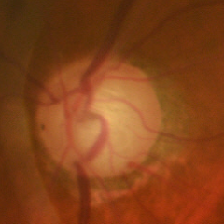

In [22]:
# 테스트 데이터 로드
from tensorflow.keras.preprocessing import image

img = image.load_img('test.png', target_size=(224,224))
img

In [25]:
import numpy as np
from tensorflow.keras.applications.resnet50 import decode_predictions

x = image.img_to_array(img).reshape(-1, 224, 224, 3)
# x = np.expand_dims(x, axis=0)
pred = model.predict(x, verbose=0)
pred

array([[0.63415635, 0.25678453, 0.10905916]], dtype=float32)